In [1]:
from sklearn import datasets


In [2]:
iris=datasets.load_iris()

In [3]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [6]:
import pandas as pd
df=pd.DataFrame({"sepal length":iris.data[:,0],
                "sepal width":iris.data[:,1],
                "petal length":iris.data[:,2],
                "petal width":iris.data[:,3],
                "species":iris.target})
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=df[["sepal length","sepal width","petal length","petal width"]]
Y=df["species"]


In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)


In [13]:
from sklearn.ensemble import RandomForestClassifier


In [14]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
Y_pred=clf.predict(X_test)

In [16]:
Y_pred

array([1, 0, 2, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2, 1, 1, 2,
       2])

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
print(confusion_matrix(Y_test,Y_pred))

[[13  0  0]
 [ 0 17  1]
 [ 0  1 13]]


In [19]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        18
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [20]:
import pandas as pd
feature_imp=pd.Series(clf.feature_importances_,index=iris.feature_names)
feature_imp

sepal length (cm)    0.100172
sepal width (cm)     0.032021
petal length (cm)    0.438445
petal width (cm)     0.429362
dtype: float64

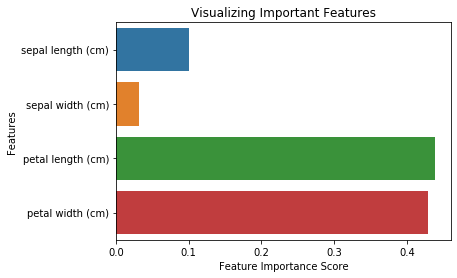

In [23]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
sb.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show()